# Preprocessing

In [2]:
import numpy as np;
import csv;
X = [];
with open('Econ_Freedom_Data.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',');
    for row in csv_reader:
        if row[0] == "2016":
            v = [];
            for i in range(6,36) :
                if (row[i]=="") :
                    v.append(-1.0);
                else :
                    v.append(float(row[i]));
            X.append(v);
i = 0;
while i < np.shape(X)[0] :
    v = X[i];
    if -1.0 in v :
        X = np.delete(X,i,0);
    else :
        i = i+1;
meanv = np.repeat(np.reshape(np.asmatrix(X.mean(0)),(1,np.shape(X)[1])),np.shape(X)[0],axis=0);
stdv = np.repeat(np.reshape(np.asmatrix(X.std(0)),(1,np.shape(X)[1])),np.shape(X)[0],axis=0);
Xs = (X-meanv) / stdv;

# k-Means Clustering (Lester Fan)

# Gaussian Mixture Model (Bill Lee)

In [61]:
from scipy.stats import multivariate_normal

def computePi(probability_matrix,j):
    extract_column = probability_matrix[:,j]
    total_col = sum(extract_column)
    return total_col/probability_matrix.shape[0]

def computeMu(probability_matrix,dataset,j):
    total_px = np.zeros((1,dataset.shape[1]))
    for i in range(len(dataset)):
        total_px += (probability_matrix[i][j]*dataset[i])
    extract_column = probability_matrix[:,j]
    total_col = sum(extract_column)
    return total_px/total_col

def computeCov(probability_matrix,dataset,j,mu):
    total_cov = np.zeros((dataset.shape[1],dataset.shape[1]))
    for i in range(len(dataset)):
        xMinusMean = dataset[i] - mu
        total_cov += probability_matrix[i][j]*(xMinusMean@xMinusMean.T)
    extract_column = probability_matrix[:,j]
    total_col = sum(extract_column)
    return (1/total_col)*(total_cov)  

def parent_pdf(datapoint,Pi,Mu,Cov,numberOfClusters):
    # Computes the f_X(x)
    total = 0
    for j in range(numberOfClusters):
        total += Pi[j]*(multivariate_normal.pdf(datapoint, Mu[j], Cov[j]))
    return total

def Pij_times_fj(Pi_j, Mu_j, Cov_j, j, datapoint):
    return Pi_j*multivariate_normal.pdf(datapoint, mean=Mu_j, cov=Cov_j)

def emAlgorithm(dataset,numberOfClusters):
    # Expectation Maximization Algorithm
    
    Pi = [(1/numberOfClusters) for i in range(numberOfClusters)]
    Mu = [10*np.random.rand(dataset.shape[1]) for i in range(numberOfClusters)]
    Sigma = [np.identity(dataset.shape[1]) for i in range(numberOfClusters)]
    
    didNotConverge = True
    probability_matrix = np.zeros((dataset.shape[0],numberOfClusters))
    epsilon = 10
    while didNotConverge:
        Theta = [Pi, Mu, Sigma]
        didNotConverge = False
        # Estimation
        for i in range(dataset.shape[0]):
            denominator = parent_pdf(dataset[i],Pi,Mu,Sigma,numberOfClusters)
            for j in range(numberOfClusters):
                probability_matrix[i][j] = Pij_times_fj(Pi[j],Mu[j],Sigma[j],j,dataset[i])/denominator
        # Maximization
        for j in range(numberOfClusters):
            Pi[j] = computePi(probability_matrix,j)
            Mu[j] = computeMu(probability_matrix,dataset,j)
            Sigma[j] = computeCov(probability_matrix,dataset,j,Mu[j])
        
        # Check Convergence
        for j in range(numberOfClusters):
            difference = np.linalg.norm(Theta[1][j]-Mu[j])
            if(difference > 0.1):
                didNotConverge = True
    return [Pi, Mu, Sigma]


U,S,V = np.linalg.svd(Xs.T)
reduced = (U[:,[0,1]].T@Xs.T)

out = emAlgorithm(reduced.T,5)


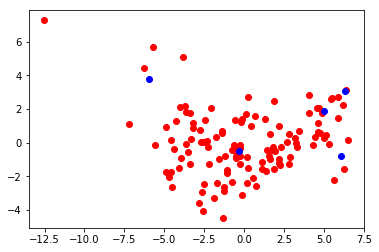

In [62]:
import mpl_toolkits.mplot3d
from matplotlib import pyplot as plt

xset = reduced[0].tolist()[0]
yset = reduced[1].tolist()[0]

fig = plt.figure()
ax = fig.add_subplot(111) 
ax.scatter(xset,yset,c='r')


mxset = []
myset = []
for each in out[1]:
    mxset.append(each.tolist()[0][0])
    myset.append(each.tolist()[0][1])
    
def plotErrorEllipse(mu, Sigma, p)
    s = -2 * log(1 - p);
    [V, D] = np.linalg.eig(Sigma * s);
    t = np.linspace(0, 2 * pi);
    a = (V * (D**0.5)) * [cos(t[:]).T, sin(t[:]).T];

    plot(a(1, :) + mu(1), a(2, :) + mu(2));
    
ax.scatter(mxset,myset,c='b')
    
    

# ---- (Anton Maliev)